# 1.Introduction
In this project, I will use the Titanic Data Set which include a sample of passengers on the Titanic, including whether 
they survived, gender, age, siblings / spouses, parents and children, fare (cost of ticket), embarkation port.

I will ask the following questions after reading the Data Set:

Which gender had a better chance of survival?

Which social class had a better chance of survival?

Which age group had a better chance of survival?

# 2.Setting up
In order to analyse and report on the data, I have choosen to use ipython notebook, along with the numpy, pandas, 
matplotlib.pyplot and seaborn python modules. In order to use these modules they needed to be imported into the 
notebook first as per below.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipy_table as tbl
from numbers import Number
from scipy import stats

%pylab inline

def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# 3.Read file from csv

In [75]:
titanic_df = pd.read_csv('titanic_data.csv')

# 4.Data Wrangling
Before working with the data I needed to look at what needed to be cleaned up, like remove redundant, find missing data.

## 4.1 Investigating Dataset and finding missing / incomplete data

In [76]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


After printing out the dataset information above, I find that the Age, Cabin and Embarked columns are missing entries. Fortunately, the Cabin column is not relevant to the analysis of the data, so I will remove that column. Also I will need to remove the entries with the missing ages and embarked port.

## 4.2 Remove unwanted columnsRemove missing ages
In order to populate the missing ages I will first remove those un wanted data from data set like Cabin, Name and Ticket first. 


In [77]:
titanic_df = titanic_df.drop(['Cabin','Name','Ticket'], axis=1)

Then we check if it is removed:

In [78]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


## 4.3 Handle datas without conplete information

Next remove those data without age and enbarked infomation:

In [79]:
titanic_df = titanic_df.dropna()

After this，I check the data again:

In [80]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


Now we can see that all datas have the same amount of information. Totally there are 712 entries.

## 4.4 Mapping data
In order to intrepret the data easier I modified:

Survived - changed to boolean (1 = True, 0 = False)

Pclass - changed to Socio-Economic status (1st - Upper Class, 2nd - Middle Class, 3rd - Lower Class)

Embarked - changed to name of embarkation port (C = Cherbourg; Q = Queenstown; S = Southampton)

I will also add a Family Size column so that I can compare the size of families with the number of survivors.


In [81]:
def map_data(df):
    survived_map = {0: False, 1: True}
    df['Survived'] = df['Survived'].map(survived_map)

    pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    df['Pclass'] = df['Pclass'].map(pclass_map)

    port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
    df['Embarked'] = df['Embarked'].map(port_map)
    
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    return df

titanic_df = map_data(titanic_df)

## 4.5 Grouping / Binning Ages
To make the ages easier to analyse I decide to group / bin the ages. This way we can compare groups of ages instead of individual ages.

In [82]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic_df['age_group'] = pd.cut(titanic_df.Age, range(0, 81, 10), right=False, labels=age_labels)

In [83]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,age_group
0,1,False,Lower Class,male,22.0,1,0,7.2500,Southampton,1,20-29
1,2,True,Upper Class,female,38.0,1,0,71.2833,Cherbourg,1,30-39
2,3,True,Lower Class,female,26.0,0,0,7.9250,Southampton,0,20-29
3,4,True,Upper Class,female,35.0,1,0,53.1000,Southampton,1,30-39
4,5,False,Lower Class,male,35.0,0,0,8.0500,Southampton,0,30-39
6,7,False,Upper Class,male,54.0,0,0,51.8625,Southampton,0,50-59
7,8,False,Lower Class,male,2.0,3,1,21.0750,Southampton,4,0-9
8,9,True,Lower Class,female,27.0,0,2,11.1333,Southampton,2,20-29
9,10,True,Middle Class,female,14.0,1,0,30.0708,Cherbourg,1,10-19
10,11,True,Lower Class,female,4.0,1,1,16.7000,Southampton,2,0-9


# 5. Analysis of data
## 5.1 Number of Survivors
Before trying to determine the characteristics of a passenger that would make them more likely to survive, the number of survivors in the sample should be compared to the actual number of survivors. Based on the information provided by the source of the dataset(Kaggle) there were 2224 passengers and 722 survivors.

In [84]:
kaggle_passengers = 2224
kaggle_nonsurvivors = 1502
kaggle_survivors = kaggle_passengers - kaggle_nonsurvivors 

sample_passengers = len(titanic_df)
sample_survivors = len(titanic_df[titanic_df.Survived==True])
sample_nonsurvivors = sample_passengers - sample_survivors


survivors_data = titanic_df[titanic_df.Survived==True]
non_survivors_data = titanic_df[titanic_df.Survived==False]

survivors = [
    ['Item','Kaggle (Count)','Kaggle (%)' ,'Sample Dataset (Count)', 'Sample Dataset (%)'],
    ['Total Passengers',kaggle_passengers,'-', sample_passengers,'-'],
    ['Survivors',
         kaggle_survivors,
         calculate_percentage(kaggle_survivors,kaggle_passengers, True), 
         sample_survivors,
         calculate_percentage(sample_survivors,sample_passengers, True) 
    ],
    ['Non-survivors', 
         kaggle_nonsurvivors,
         calculate_percentage(kaggle_nonsurvivors,kaggle_passengers, True), 
         sample_nonsurvivors,
         calculate_percentage(sample_nonsurvivors,sample_passengers, True) 
    ]
]
tbl.make_table(survivors)

Item,Kaggle (Count),Kaggle (%),Sample Dataset (Count),Sample Dataset (%)
Total Passengers,2224,-,712,-
Survivors,722,32.46%,288,40.45%
Non-survivors,1502,67.54%,424,59.55%


When comparing the number of survivors from the sample dataset to the actual number of survivors we can see that the percentage of survivors is realitively close to each other, but still can tell some diffrences.

## 5.2 Invest which gender had a better chance of survival
In order to answer this I need to look at how many males and females were on board and which gender had the highest survival rate.

### Hypothesis

The hypothesis for this question is that the gender does impact the chances of survival.

H0 = Gender has no impact on survivability

HA = Gender does impact the chances of survivabily

### Count of Survivors by Gender

In [85]:
table = pd.crosstab(titanic_df['Survived'],titanic_df['Sex'])
print table

Sex       female  male
Survived              
False         64   360
True         195    93


### Proportion of survivors by Gender

In [86]:
print titanic_df.groupby('Sex').Survived.mean()

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64


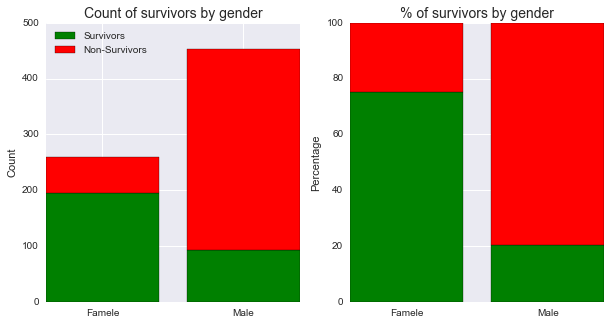

In [87]:
survivors_gender = survivors_data.groupby(['Sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

totals = survivors_gender + non_survivors_gender

data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100

gender_categories = ['Famele', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=1.0, color='g')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', 
        alpha=1.0, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=1.0, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=1.0, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)

The plots and proportions above show that there were a significant difference between the number of males on board the Titanic compared to the number of females. However, the second plot (% of survivors by gender) shows that Females had a higher proportion (75.29%) of survivors compared to the proportion of males (20.53%). This shows that females had a greater chance of survival in Titanic.

As the P-Value is less than 0.05, the probability of that the age group will impact the chances of survival is high. Therefore I should reject the null hypothesis.


### Hypothesis Test
For this test I will be using the chi-sqaure test for independence

In [98]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,202.8694
P-Value,0.0000


The P-Value is less than 0.05 the probability of that the gender will impact the chances of survival is high. Therefore I can reject the null hypothesis. The plots above confirm this result.


## Which social had better chance to survive?

### Hypothesis

The hypothesis for this question is that the social class does impact the chances of survival

H0 = Social Class has no impact on survivability

HA = Social Class does impact the chances of survivabily

First count of suvivors by class:

In [89]:
table = pd.crosstab(titanic_df['Survived'],titanic_df['Pclass'])
print table

Pclass    Lower Class  Middle Class  Upper Class
Survived                                        
False             270            90           64
True               85            83          120


Now calculate proportion of survivors by class:

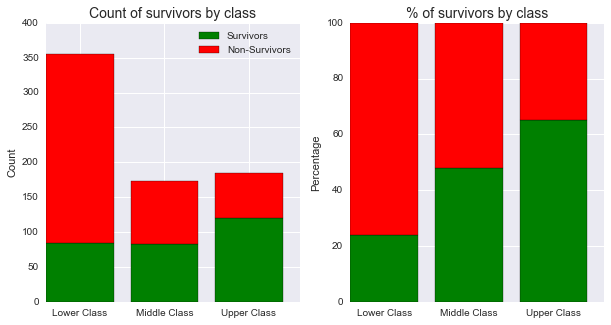

In [90]:
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

totals = survivors_class + non_survivors_class

data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['Lower Class', 'Middle Class', 'Upper Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=1.0, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=1.0,
        color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=1.0, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=1.0, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)

The graphs above shows that whilst the lower class had more passengers than all classes, and more survivors than the middle class, the lower class had the lowest survival rate. The Upper Class passengers had the highest survival rate


### Hypothesis Test
For this test I will be using the chi-sqaure test for independence

In [91]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['Pclass'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,91.0807
P-Value,0.0000


The P-Value is less than 0.05 the probability of that the social class will impact the chances of survival is high. Therefore I can reject the null hypothesis. The plots above confirm this result.

## 5.4 Which age group had a better chance of survival?

### Hypothesis
The hypothesis for this question is that the age group does impact the chances of survival

H0 = Age Group has no impact on survivability

HA = Age Group does impact the chances of survivabily

### Distribution of Age Groups

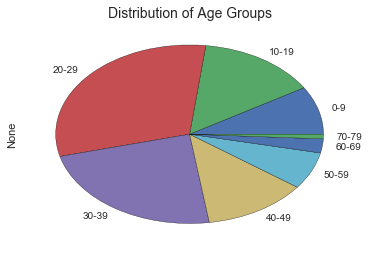

In [100]:
titanic_df.groupby(['age_group']).size().plot(kind = 'pie')
plt.title("Distribution of Age Groups",fontsize=14)


I found that passengers in 20 - 29 survived most.

### Poportion of survivors by age group

In [101]:
print titanic_df.groupby(['age_group']).Survived.mean()

age_group
0-9      0.612903
10-19    0.401961
20-29    0.350000
30-39    0.433735
40-49    0.382022
50-59    0.416667
60-69    0.277778
70-79    0.000000
Name: Survived, dtype: float64


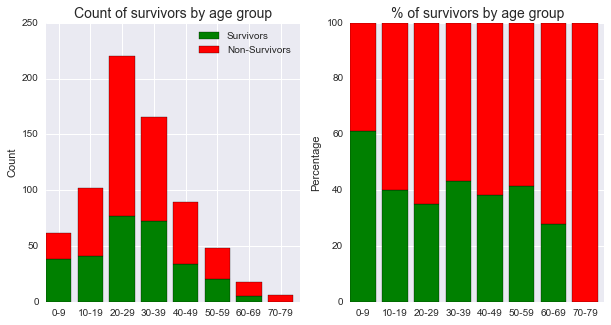

In [102]:
survivors_age_group = survivors_data.groupby(['age_group']).size().values
non_survivors_age_group = non_survivors_data.groupby(['age_group']).size().values

totals = survivors_age_group + non_survivors_age_group

data1_percentages = calculate_percentage(survivors_age_group, totals)*100 
data2_percentages = calculate_percentage(non_survivors_age_group, totals)*100 


tick_spacing = np.array(range(len(age_labels)))+0.4


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.bar(range(len(survivors_age_group)), survivors_age_group, label='Survivors', alpha=1.0, color='g')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Non-Survivors',
        alpha=1.0, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, age_labels )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=1.0, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=1.0, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  age_labels)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by age group",fontsize=14)

When looking at proportions and percentages of survivors per age group, I thought that this analysis should take into consideration about the gender / sex of the passengers as well.

In [103]:
print titanic_df.groupby(['Sex','age_group']).Survived.mean()

Sex     age_group
female  0-9          0.633333
        10-19        0.755556
        20-29        0.722222
        30-39        0.830508
        40-49        0.687500
        50-59        0.888889
        60-69        1.000000
male    0-9          0.593750
        10-19        0.122807
        20-29        0.168919
        30-39        0.214953
        40-49        0.210526
        50-59        0.133333
        60-69        0.133333
        70-79        0.000000
Name: Survived, dtype: float64


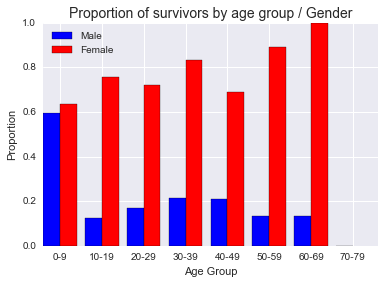

In [104]:
male_data = titanic_df[titanic_df.Sex == "male"].groupby('age_group').Survived.mean().values
female_data = titanic_df[titanic_df.Sex == "female"].groupby('age_group').Survived.mean().values
ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

After relooking at the proportion of survivors by age group and gender, the data shows that the notion of women and children to be given preferential treatment over men. The plot "Proportion of survivors by age group / gender", shows that children (0-9 years old, whatever male or female) and women (all ages) had a much higher proportion of survivors than adult male. This supports the story of the seats in the lifeboats been given to Women and Children first.

### Hypothesis Test
For this test I will be using the chi-sqaure test for independence

In [105]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['age_group'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,19.9865
P-Value,0.0056


The P-Value is less than 0.05 the probability of that the age group will impact the chances of survival is high. Therefore I can reject the null hypothesis. The plots above confirm this result.

# 6.Conclusion
## 6.1 Limitations of dataset


The are a number of limitations with the Titanic Dataset, which are caused by: missing data only been a sample of the data. The missing data and size of the sample could skew the results for example the missing ages.
There were 53 ages missing for females and 124 ages missing for males. I had a choice with how to handle the missing ages each with their pros and cons.

With deleting the rows with the missing ages - this would limit the accuracy of the analysis of the gender and class, however the accuracy of the analysis of the Age factor would be more accurate

The size of the sample data could also distort the results as we don't know if this is a random sample or if the selection of the data is biased or unbiased.

## 6.2 Other variables

As with most datasets the more information we have the better it can be analysed. I believe that we could add the following variable:

life boat number - the reason why there were so many fatalities on board the Titanic was due to there not been enough lifeboats. I believe that if we knew the lifeboat number and the capacity of a lifeboat we could determine if it was possible for more people to survive.

Which side did passengers left Titanic - I have heard some rumors that the survive rate on left and right side of Titanic are quite different, especially for male passengers. So I think it is worth to make a investigation about this factor.

## 6.3 Conclusions

I setup 3 hypothesis, and make investigation about them, after plot and calculation, here is the conclusions:

First, Gender does impact the chances of survivabily, famale get a significant higher survive rate than male.

Second, Social Class does impact the chances of survivabily, the higher class a person was, the higher survive rate they had.

Third, Age Group does impact the chances of survivabily, Children have higher survive rate no matter they are boys or girls and elder people (over 70) had nearly no chance to survive in this sample.

# 7.Reference
https://en.wikipedia.org/wiki/Chi-squared_test

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.chi2_contingency.html